# 分析泰坦尼克号的数据

## 哪些因素会让船上的人生存率更高

### 重点分析四个因素：船票等级（Pclass），性别（Sex），年龄（Age）以及是否有人陪伴（SibSp or Parch）

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('titanic-data.csv')

## 整理数据

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


###  可以看出，乘客年龄、船舱和登船地这三列存在缺失值，针对这三列进行数据清理，去掉缺失值。
###  因为船舱列缺失值较多，分析价值不大，所以整列清除

In [4]:
df = titanic_df.drop(['Cabin'], axis=1)  #删除Cabin列

In [5]:
df.dropna(subset=['Age', 'Embarked'], inplace=True)  #删除在Age、Embarked列中含有空值的行
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


# 分析部分

## 一、分析一下男性和女性的生存情况

### 1、男性乘客和女性乘客的人数

In [6]:
group_sex = df.groupby('Sex').count()
group_sex

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked
Sex,,,,,,,,,,
female,259,259,259,259,259,259,259,259,259,259
male,453,453,453,453,453,453,453,453,453,453


There is 453 male and 259 female in this sample


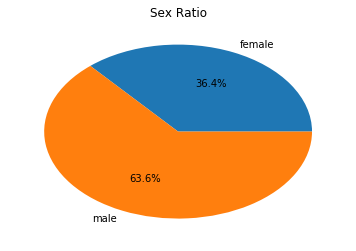

In [7]:
num_male = group_sex['PassengerId'].loc['male']
num_female = group_sex['PassengerId'].loc['female']
print 'There is {} male and {} female in this sample'.format(num_male, num_female)
group_sex['PassengerId'].plot(kind='pie', autopct='%.1f%%')
plt.title('Sex Ratio')
plt.ylabel('')
plt.show()

### 在这个样本中，男性乘客453名（约占63.6%），女性乘客259名（约占36.4%）

### 2、男性乘客和女性乘客的幸存率

[ 0.75289575  0.20529801]
<class 'pandas.core.series.Series'>
Populating the interactive namespace from numpy and matplotlib
0 0.752895752896
1 0.205298013245


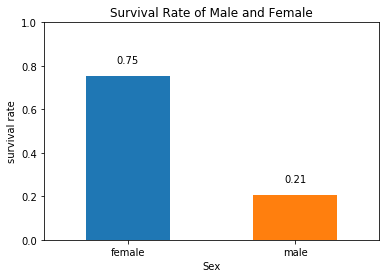

In [8]:
survived_sex = df.groupby('Sex')['Survived'].mean()
print survived_sex.values
print type(survived_sex)
%pylab inline
survived_sex.plot.bar()
plt.ylim(0, 1)  #设定 y 轴坐标范围
plt.xticks(rotation=0)  #设定 x 轴刻度值的角度
plt.ylabel('survival rate')
plt.title('Survival Rate of Male and Female')
for x, y in enumerate(survived_sex.tolist()):  #为柱状图添加 y 轴数值
    print x, y
    plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom',fontsize=10) 

### 可以看出男性幸存率为21%，女性幸存率为75%，女性幸存率几乎是男性的3.5倍

## 二、分析船票等级与生存情况的关系

### 1、持不同船票的乘客人数分布情况

In [9]:
group_pclass = df.groupby('Pclass').count()
group_pclass

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
Pclass,,,,,,,,,,
1,184,184,184,184,184,184,184,184,184,184
2,173,173,173,173,173,173,173,173,173,173
3,355,355,355,355,355,355,355,355,355,355


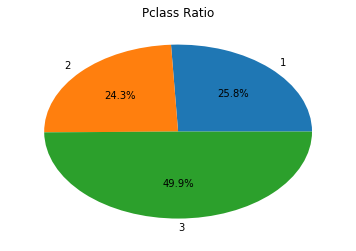

In [10]:
group_pclass['PassengerId'].plot.pie(autopct='%.1f%%')
plt.title('Pclass Ratio')
plt.ylabel('')
plt.show()

### 在这个样本中，头等舱乘客184名（约占25.8%），普通舱乘客173名（约占24.3%），经济舱乘客355（约占49.9%）

### 2、不同舱位乘客的幸存率

Pclass
1    0.652174
2    0.479769
3    0.239437
Name: Survived, dtype: float64
0 0.652173913043
1 0.479768786127
2 0.239436619718


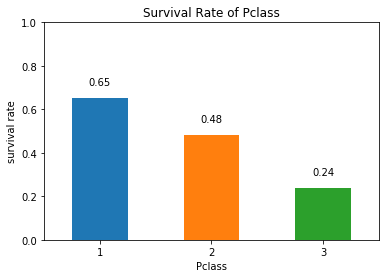

In [11]:
survived_Pclass = df.groupby('Pclass')['Survived'].mean()  #购买不同等级船票的乘客的幸存比例
print survived_Pclass
survived_Pclass.plot(kind='bar')
plt.ylim(0, 1)  #设定 y 轴坐标范围
plt.xticks(rotation=0)  #设定 x 轴刻度值的角度
plt.ylabel('survival rate')
plt.title('Survival Rate of Pclass')
for x, y in enumerate(survived_Pclass.tolist()):  #为柱状图添加 y 轴数值
    print x, y
    plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom',fontsize=10) 

### 可以看出头等舱的乘客存活比例最高，为0.65；其次为普通舱，为0.48；存活率最低的为经济舱，为0.24

## 三、分析乘客年龄与幸存情况的关系

In [12]:
print df['Age'].max()
print df['Age'].min()

80.0
0.42


In [13]:
bins = np.arange(0,90,10)
bins

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80])

In [14]:
age_group_series = pd.cut(df['Age'], bins)

In [15]:
df['Age_group'] = age_group_series    #将乘客年龄划入不同的年龄区间

In [16]:
num_age = df.groupby('Age_group')['Survived'].count()
num_age

Age_group
(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    154
(40, 50]     86
(50, 60]     42
(60, 70]     16
(70, 80]      5
Name: Survived, dtype: int64

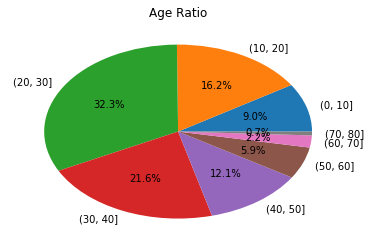

In [17]:
num_age.plot.pie(autopct='%.1f%%')
plt.title('Age Ratio')
plt.ylabel('')
plt.show()

### 在这个样本中，10岁以下乘客64名（约占9.0%），10-20岁乘客115名（约占16.2%），20-30岁乘客230名（约占32.3%），30-40岁乘客154名（约占21.6%），40-50岁乘客86名（约占12.1%），50-60岁乘客42名（约占5.9%），60-70岁乘客16名（约占2.2%），70-80岁乘客5名（约占0.7%）

Age_group
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.441558
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.187500
(70, 80]    0.200000
Name: Survived, dtype: float64


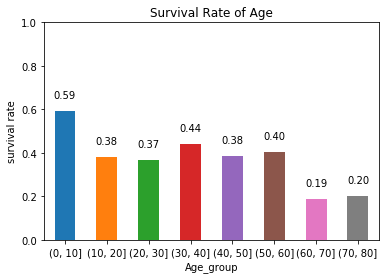

In [18]:
survived_age = df.groupby('Age_group')['Survived'].mean()  #不同年龄区间得幸存率
print survived_age
survived_age.plot(kind='bar')
plt.ylim(0, 1)  #设定 y 轴坐标范围
plt.xticks(rotation=0)  #设定 x 轴刻度值的角度
plt.ylabel('survival rate')
plt.title('Survival Rate of Age')
for x, y in enumerate(survived_age.tolist()):  #为柱状图添加 y 轴数值
    plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom',fontsize=10) 

### 9岁以下儿童幸存率最高，10岁至59岁的人幸存率基本一致，60岁以上的人幸存率较低

## 四、分析乘客年龄及船票价格的相关性

In [19]:
df = df.sort_values(['Age'])

In [20]:
# df.index = df['Age'].tolist()

Text(0.5,1,u'Age and Fare')

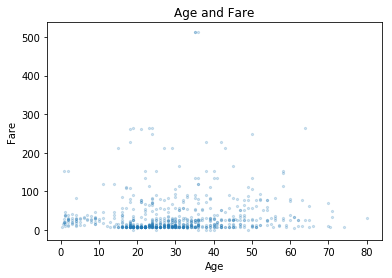

In [37]:
plt.scatter(df['Age'], df['Fare'], s=5, alpha=0.2)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age and Fare')

### 从上图可以看出，大部分乘客的船票价格都在100以下

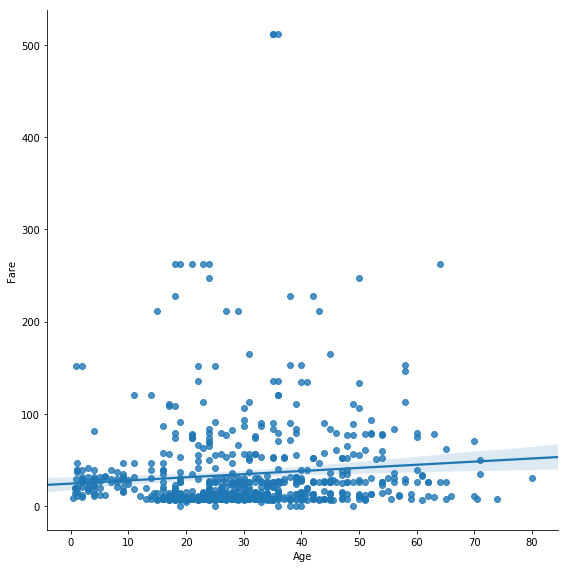

In [35]:
sns.lmplot("Age", "Fare", df, size=8)

### 由上图可以看出，船票价格与乘客年龄的趋势线基本水平，说明相关性不大

In [26]:
Fare = df['Fare']
Age = df['Age']

In [27]:
# 计算相关性的函数
def correlation(x, y):
    x_standardized = (x - x.mean())/x.std(ddof=0)
    y_standardized = (y - y.mean())/y.std(ddof=0)
    return (x_standardized * y_standardized).mean()

In [28]:
correlation(Fare, Age)

0.093142517894115193

### 乘客年龄和船票价格的相关性仅约为0.09

# 结论：

## 一、女性乘客在事故中的幸存率远高于男性乘客

## 二、头等舱乘客幸存率高于其他两种舱位的乘客

## 三、10岁以下儿童幸存率高于其他年龄段的乘客

## 四、乘客年龄与船票价格的相关性很小，仅为0.09

# 限制因素：

## 一、通过查阅资料，泰坦尼克号当时共载运2207人,其中乘客1316人,船员891人。该样本仅包含了乘

## 客，没有包括船员

## 二、样本数占总体数的67.7%，如果为随机抽取的样本，基本可以代表总体

## 三、我去掉了没有年龄参数的数据，有可能影响分析结果。可能乘坐经济仓的乘客没有登记年龄，

## 导致最终结果有偏差